In [36]:
import pandas as pd
import pingouin as pg
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_context("notebook", font_scale=1.5)

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned2.csv'
file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv'
data = pd.read_csv(file)

In [18]:
data.present.unique()

array(['n', 'y'], dtype=object)

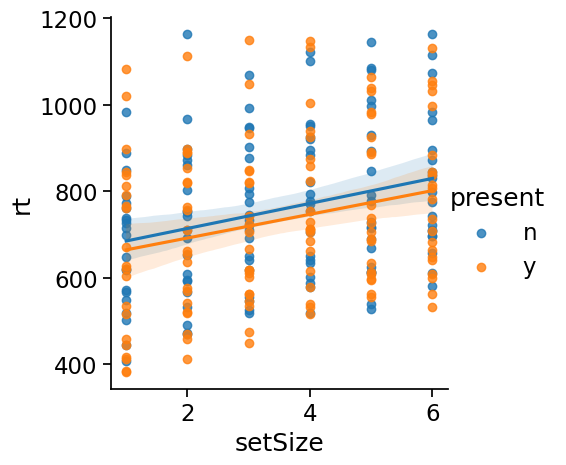

In [20]:
ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present"
)

In [28]:
mod = pg.linear_regression(data['setSize'], data['rt'], as_dataframe = True )
mod

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,646.342855,25.123576,25.726547,3.336052e-72,0.070847,0.06713,596.862013,695.823696
1,setSize,28.165837,6.451139,4.366026,1.853772e-05,0.070847,0.06713,15.460330,40.871344


In [40]:
aov = pg.rm_anova(data = data, dv = 'rt', within = ['setSize','present'], subject = 'id')
aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,setSize,607451.384765,5,100,121490.276953,21.773820,1.082442e-14,1.800361e-09,0.074208,0.584939
1,present,37484.471827,1,20,37484.471827,3.832449,6.436973e-02,6.436973e-02,0.004922,1.000000
2,setSize * present,7016.471209,5,100,1403.294242,0.210214,9.574832e-01,9.006265e-01,0.000925,0.644193
